>> 1. RNN

순환신경망 (Recurrent Neural Network)는 순서가 있는 데이터셋에 대한 모델을 만들때 활용합니다. 



RNN은 순서가 있는 데이터셋에 활용가능합니다. 

과거 시점의 데이터들에 대한 연산이 내부적으로 연결되어 있습니다

https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcnCGKz%2Fbtq6lnvt0pV%2FPYdHH60qw3u1BNOMXpFzx0%2Fimg.png

sin 함수를 만들어서 데이터 예측을 해보겠습니다. 

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

numpy의 linspace()를 사용하여 동일한 간격으로 값을 가지게 만들 수 있습니다. 
이렇게 x를 만들고, sin함수를 적용하여 sin 함수 그래프를 만들어 보겠습니다. 

In [2]:
import numpy as np
x = np.linspace(0, 100, 1000) # Start, End, N
y = np.sin(x)

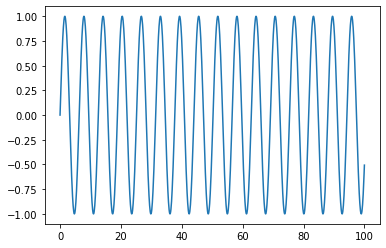

In [3]:
import matplotlib.pyplot as plt

plt.plot(x,y)

train, test 셋을 분할하겠습니다. 
이 경우는 순서가 있는 데이터셋이므로 데이터를 섞지 않고, 분할하겠습니다. 

1000개의 데이터 중 300개를 test set으로 나눕니다

In [4]:
TEST_SIZE = 300

train = y[:-TEST_SIZE]
test = y[-TEST_SIZE:]

20개의 데이터를 보고, 1개를 예측하는 모델을 만들어 보겠습니다. 

20개의 x 컬럼, 한개의 y 컬럼을 만들어 줍니다. 

In [5]:
window_size = 20

inputs = []
targets = []
for i in range(len(train) - window_size):
    inputs.append(train[i:i+window_size])
    targets.append(train[i+window_size])


In [6]:
inputs[0]

array([0.        , 0.09993302, 0.19886554, 0.29580708, 0.3897871 ,
       0.47986471, 0.56513807, 0.64475345, 0.71791378, 0.7838866 ,
       0.84201141, 0.89170627, 0.93247368, 0.96390547, 0.98568695,
       0.99760007, 0.99952556, 0.99144412, 0.97343668, 0.94568351])

In [7]:
targets[0]

0.9084624783454199

In [8]:
inputs = np.array(inputs)
targets = np.array(targets)

In [9]:
print(inputs.shape)
print(targets.shape)

(680, 20)
(680,)


같은 방법으로 테스트셋도 만들겠습니다. 

In [10]:
# 테스트 셋도 만들어 봅니다
window_size = 20

test_inputs = []
test_targets = []
for i in range(len(test) - window_size):
    test_inputs.append(test[i:i+window_size])
    test_targets.append(test[i+window_size])
test_inputs=np.array(test_inputs)
test_targets = np.array(test_targets)

In [11]:
test_inputs.shape

(280, 20)

RNN에 넣기 위해 input데이터의 차원수를 늘려주겠습니다. 

In [12]:
inputs = np.expand_dims(inputs,2)
test_inputs = np.expand_dims(test_inputs,2)

print(inputs.shape)
print(test_inputs.shape)

(680, 20, 1)
(280, 20, 1)


가장 단순한 형태의 RNN을 만들어 보겠습니다. 

10개의 Unit을 가진 RNN을 만들었습니다. 

다음 1개의 값을 예측하는 것이므로 최종 Layer는 1개의 dense layer를 사용하였습니다

In [13]:
# 가장 간단한 형태의 RNN을 만들어 봅니다

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = tf.keras.Sequential()
model.add(layers.SimpleRNN(10, input_shape=(20,1)))
model.add(layers.Dense(1))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


오차(MSE)를 최소화하도록 학습합니다. 
early stopping을 적용하여 과적합되는 것을 방지합니다.

In [15]:
# mse를 최소화해봅니다

model.compile(loss='mean_squared_error', optimizer='adam')

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history = model.fit(inputs, targets, epochs=100, validation_data=(test_inputs, test_targets), callbacks = [callback])

Epoch 1/100
22/22 [==============================] - 2s 37ms/step - loss: 0.5142 - val_loss: 0.3815
Epoch 2/100
22/22 [==============================] - 0s 11ms/step - loss: 0.2847 - val_loss: 0.1954
Epoch 3/100
22/22 [==============================] - 0s 13ms/step - loss: 0.1311 - val_loss: 0.0663
Epoch 4/100
22/22 [==============================] - 0s 13ms/step - loss: 0.0381 - val_loss: 0.0244
Epoch 5/100
22/22 [==============================] - 0s 15ms/step - loss: 0.0203 - val_loss: 0.0159
Epoch 6/100
22/22 [==============================] - 0s 12ms/step - loss: 0.0126 - val_loss: 0.0089
Epoch 7/100
22/22 [==============================] - 0s 15ms/step - loss: 0.0064 - val_loss: 0.0039
Epoch 8/100
22/22 [==============================] - 0s 20ms/step - loss: 0.0028 - val_loss: 0.0019
Epoch 9/100
22/22 [==============================] - 0s 14ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 10/100
22/22 [==============================] - 0s 17ms/step - loss: 0.0014 - val_loss: 0.0015

예측하고 Prediction과 실제값을 비교해봅니다

In [16]:

pred = model.predict(test_inputs)

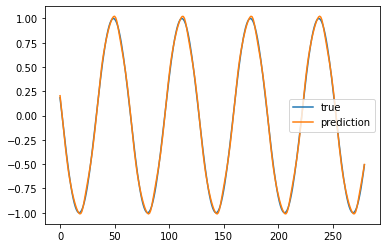

In [17]:
plt.plot(test_targets, label = 'true')
plt.plot(pred, label = 'prediction')
plt.legend()

예측이 잘 된 것처럼 보입니다. 그래프를 좀 더 확대해서 그려봅시다

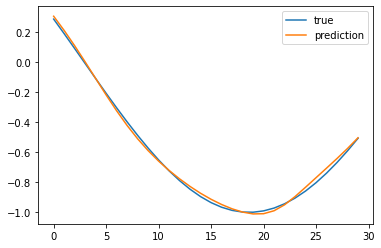

In [18]:
plt.plot(test_targets[-30:], label = 'true')
plt.plot(pred[-30:], label = 'prediction')
plt.legend()

sin함수에 대한 정보가 없으나, 꽤 정확하게 예측하는 걸 볼 수 있습니다

>> 2. LSTM

Simple RNN의 성능을 개선한 LSTM (Long Short Term Memory) 및 GRU 등 다른 레이어 사용도 가능합니다. 

동일한 데이터로 비교하여 봅시다. 

텐서플로우에서는 Layer 이름 변경만으로 손쉽게 변경이 가능합니다. 

In [19]:
model2 = tf.keras.Sequential()
model2.add(layers.LSTM(10, input_shape=(20,1)))
model2.add(layers.Dense(1))

In [20]:
model2.compile(loss='mean_squared_error', optimizer='adam')
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model2.fit(inputs, targets, epochs=100, validation_data=(test_inputs, test_targets), callbacks = [callback])

Epoch 1/100
22/22 [==============================] - 3s 41ms/step - loss: 0.6478 - val_loss: 0.5237
Epoch 2/100
22/22 [==============================] - 0s 13ms/step - loss: 0.4250 - val_loss: 0.3621
Epoch 3/100
22/22 [==============================] - 0s 13ms/step - loss: 0.2946 - val_loss: 0.2504
Epoch 4/100
22/22 [==============================] - 0s 11ms/step - loss: 0.2036 - val_loss: 0.1684
Epoch 5/100
22/22 [==============================] - 0s 11ms/step - loss: 0.1379 - val_loss: 0.1099
Epoch 6/100
22/22 [==============================] - 0s 13ms/step - loss: 0.0885 - val_loss: 0.0663
Epoch 7/100
22/22 [==============================] - 0s 14ms/step - loss: 0.0491 - val_loss: 0.0323
Epoch 8/100
22/22 [==============================] - 0s 13ms/step - loss: 0.0200 - val_loss: 0.0094
Epoch 9/100
22/22 [==============================] - 0s 13ms/step - loss: 0.0058 - val_loss: 0.0039
Epoch 10/100
22/22 [==============================] - 0s 11ms/step - loss: 0.0035 - val_loss: 0.0029

결과를 확인해보겠습니다. 

LSTM으로 학습한 모델은 거의 완벽하게 일치하고 있습니다. 
이는 Simple RNN이 early stopping으로 학습이 덜 되었기 때문일 수 있습니다. 

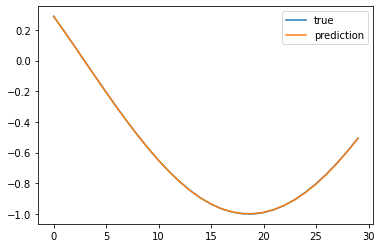

In [21]:
pred2 = model2.predict(test_inputs)
plt.plot(test_targets[-30:], label = 'true')
plt.plot(pred2[-30:], label = 'prediction')
plt.legend()